In [5]:
import numpy as np
import xarray as xr
import pandas as pd 
import matplotlib.pyplot as plt

In [6]:
ocean_data=xr.open_dataset("/Users/loganknudsen/Documents/UMD_Research_Local_File_Saves/psi_b_change_flat.nc")
tf =int(5*2*np.pi/10**(-4)) #314159
# ocean_data2 = ocean_data.sel(time=slice("0",str(tf)))

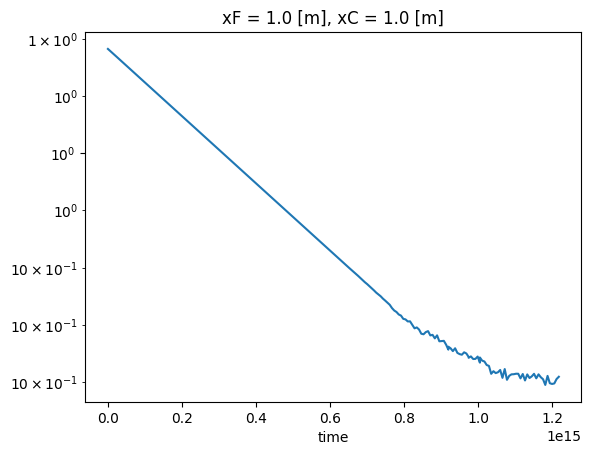

In [7]:
dot_prod = np.square((ocean_data["u"]).mean(dim=["yC","zC"]))+np.square((ocean_data["v"]).mean(dim=["yF","zC"]))+np.square(ocean_data["w"].mean(dim=["yC","zF"]))
KE = 0.5*dot_prod
KE_5 = KE.isel(time=51)
KE_new=KE/KE_5
# dt = (KE["time"].dt.seconds[1]-KE["time"].dt.seconds[0]).to_numpy()
# KE_DT = (KE[1:].to_numpy()-KE[:-1].to_numpy())/(dt)
# KE_DT_norm =KE_DT/KE[1:]
# KE_dt = KE[1:]-KE[0:-1]
# KE_norm = KE/KE[0]
# plt.plot(ocean_data.time/1e9*(10**(-4)/(2*np.pi)),KE_DT)
# KE_DT_norm.plot()
KE_new.plot()
plt.yscale("log")

In [33]:
f = 2*(7.292115e-5)*np.sin(np.pi/4)
B = ocean_data.B#+ocean_data.B
N = ((B[:,1:,:,:]-B[:,:-1,:,:])/1)**(0.5)
mean_N= N.mean(dim=["yC","zC"])
N_f = mean_N/f

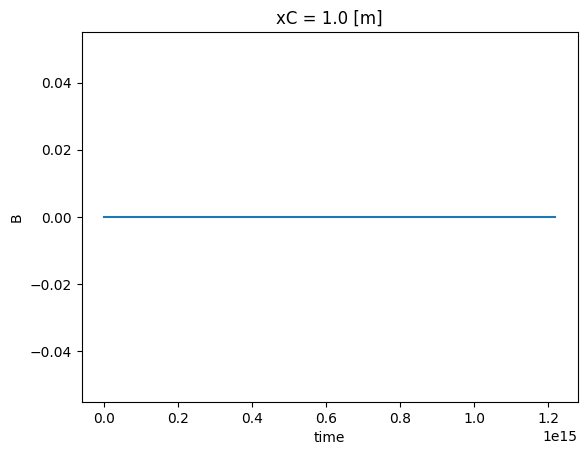

In [34]:
N_f.plot()

In [29]:
B[:,:-1,:,:]

<xarray.DataArray (time: 205, zC: 199, yC: 1024, xC: 1)>
array([[[[-1.41629053e-02],
         [-1.41647526e-02],
         [-1.41665999e-02],
         ...,
         [-1.60490087e-02],
         [-1.60508560e-02],
         [-1.60527033e-02]],

        [[-1.40919179e-02],
         [-1.40937652e-02],
         [-1.40956125e-02],
         ...,
         [-1.59780213e-02],
         [-1.59798687e-02],
         [-1.59817160e-02]],

        [[-1.40209305e-02],
         [-1.40227778e-02],
         [-1.40246252e-02],
         ...,
...
         ...,
         [-2.32479303e-03],
         [-2.34456610e-03],
         [-2.40118983e-03]],

        [[-3.14752699e-04],
         [-3.40816515e-04],
         [-2.81257373e-04],
         ...,
         [-2.18421972e-03],
         [-2.13200207e-03],
         [-2.21915015e-03]],

        [[-1.43406906e-04],
         [-1.29041567e-04],
         [-9.05766273e-05],
         ...,
         [-2.02937432e-03],
         [-2.00601740e-03],
         [-2.02431882e-03]]]])
Coordinates:
  * zC       (zC) float64 -199.5 -198.5 -197.5 -196.5 ... -4.5 -3.5 -2.5 -1.5
  * xC       (xC) float64 1.0
  * yC       (yC) float64 1.465 4.395 7.324 ... 2.993e+03 2.996e+03 2.999e+03
  * time     (time) timedelta64[ns] 00:00:00 ... 14 days 02:29:04.397107935

In [36]:
ocean_data.B/f+ocean_data.b/f

<xarray.DataArray (time: 205, zC: 200, yC: 1024, xC: 1)>
array([[[[-1.37335826e+02],
         [-1.37353739e+02],
         [-1.37371652e+02],
         ...,
         [-1.55625122e+02],
         [-1.55643036e+02],
         [-1.55660949e+02]],

        [[-1.36647471e+02],
         [-1.36665384e+02],
         [-1.36683297e+02],
         ...,
         [-1.54936767e+02],
         [-1.54954680e+02],
         [-1.54972593e+02]],

        [[-1.35959116e+02],
         [-1.35977029e+02],
         [-1.35994942e+02],
         ...,
...
         ...,
         [-2.11800907e+01],
         [-2.06737431e+01],
         [-2.15188065e+01]],

        [[-1.39059787e+00],
         [-1.25129907e+00],
         [-8.78309618e-01],
         ...,
         [-1.96785753e+01],
         [-1.94520863e+01],
         [-1.96295528e+01]],

        [[ 8.77678297e-01],
         [ 6.06595847e-01],
         [ 8.89630276e-01],
         ...,
         [-1.78601935e+01],
         [-1.76582402e+01],
         [-1.74285493e+01]]]])
Coordinates:
  * zC       (zC) float64 -199.5 -198.5 -197.5 -196.5 ... -3.5 -2.5 -1.5 -0.5
  * xC       (xC) float64 1.0
  * yC       (yC) float64 1.465 4.395 7.324 ... 2.993e+03 2.996e+03 2.999e+03
  * time     (time) timedelta64[ns] 00:00:00 ... 14 days 02:29:04.397107935